<a href="https://colab.research.google.com/github/nika-va/Netflix-data-analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  


<div align="center">
  <h1> <p align="center"><img style="float: right;" src="https://cdn.icon-icons.com/icons2/3053/PNG/512/netflix_macos_bigsur_icon_189917.png" width="40" ></p> Netflix Userbase analysis</h1>
</div>

### 🔸 **About data:**



> The dataset provides a snapshot of a sample Netflix userbase, showcasing various aspects of user subscriptions, revenue, account details, and activity. Each row represents a unique user, identified by their User ID. The dataset includes information such as the user's subscription type (Basic, Standard, or Premium), the monthly revenue generated from their subscription, the date they joined Netflix (Join Date), the date of their last payment (Last Payment Date), and the country in which they are located.



> Additional columns have been included to provide insights into user behavior and preferences. These columns include Device Type (e.g., Smart TV, Mobile, Desktop, Tablet) and Account Status (whether the account is active or not). The dataset serves as a synthetic representation and does not reflect actual Netflix user data. It can be used for analysis and modeling to understand user trends, preferences, and revenue generation within a hypothetical Netflix userbase.







### 🔸 **Dataset is imported from:**

https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset

### 🔸 **Content table:**

1.   [Load and Check data](#1)
  *   [Convert date columns](#1.1)
1.   [Familiarize with data](#2)
  *   [Variable description](#2.1)
  *   [Feature frequency](#2.2)
  *   [Drop repetitive data](#2.3)
1. [Outlier detection](#3)
1. [Visualization](#4)
1. [Feature Engineering](#5)
1. [Encoding categorical data](#6)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
import datetime
import warnings

<ipython-input-1-162a02f801c0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<a name = "1"></a><br>
# 1. Load and Check data



In [ ]:
netflix_df = pd.read_csv('/content/Netflix Userbase.csv')
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


<a name = "1.1"></a><br>

* convert date columns into datetime

In [ ]:
netflix_df['Join Date'] = [datetime.datetime.strptime(x, "%d-%m-%y") for x in netflix_df['Join Date']]

In [ ]:
netflix_df['Last Payment Date'] = [datetime.datetime.strptime(x, "%d-%m-%y") for x in netflix_df['Last Payment Date']]

In [ ]:
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [ ]:
netflix_df['Join Date'].dtype

dtype('<M8[ns]')

<a name = "2"></a><br>
# 2. Familiarize with data


<a name = "2.1"></a><br>
## 2.1 Variable description

In [ ]:
netflix_df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [ ]:
netflix_df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [ ]:
netflix_df.info(), len(netflix_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


(None, 2500)

In [ ]:
netflix_df['User ID'].is_unique

True

In [ ]:
category_cols = ['Subscription Type', 'Country', 'Gender', 'Device']
numeric_cols = ['Monthly Revenue', 'Age']

<a name = "2.2"></a><br>
##2.2 Feature frequency

In [ ]:
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [ ]:
def bar_plot(columns):
  for col in columns:
    plt.figure(figsize=(10.5,2.5))
    x = netflix_df[col].value_counts()
    plt.bar(x.index, x.values)
    plt.show()
    print(x)

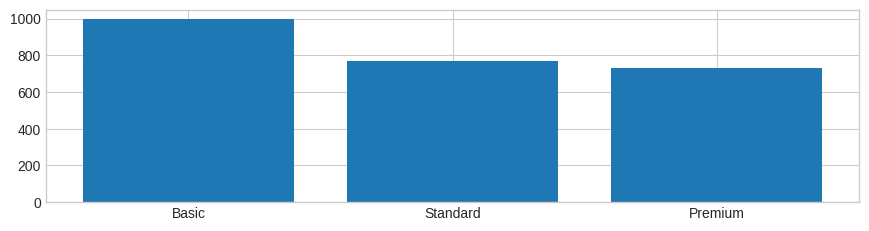

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64


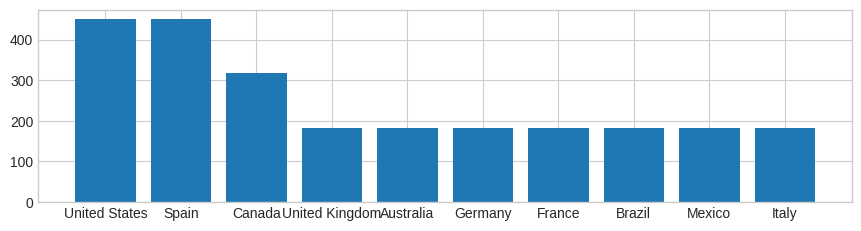

United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: Country, dtype: int64


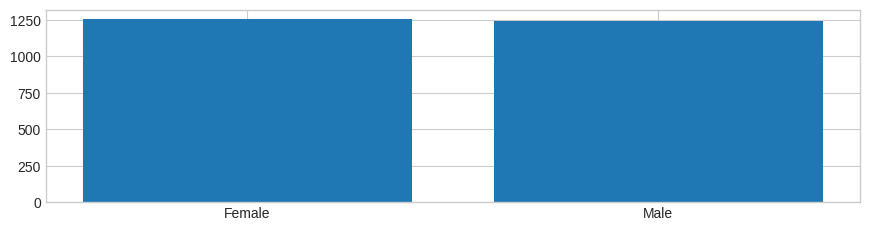

Female    1257
Male      1243
Name: Gender, dtype: int64


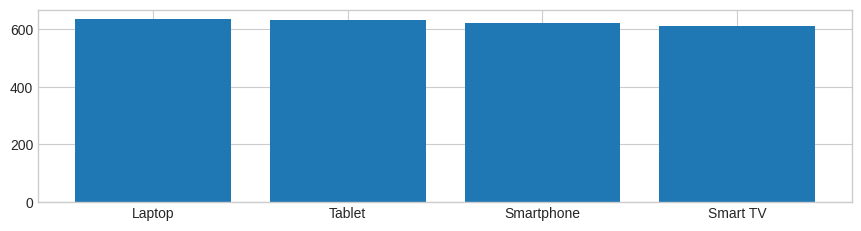

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64


In [ ]:
bar_plot(category_cols)

* Basic plan is the most popular
* US, Spain users are top 1, and Canada comes next
* gender and device type are perfectly balanced

In [ ]:
def hist_plot(columns):
  for col in columns:
    plt.figure(figsize=(6,4))
    plt.hist(netflix_df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"{col} distribution")
    plt.show()

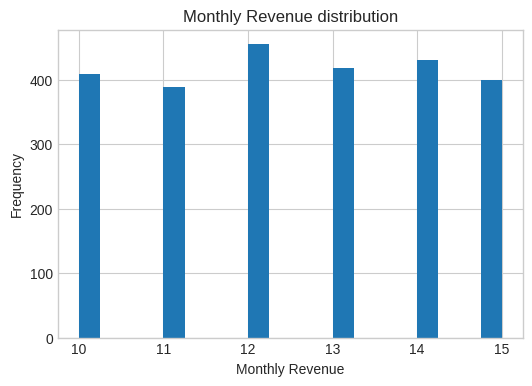

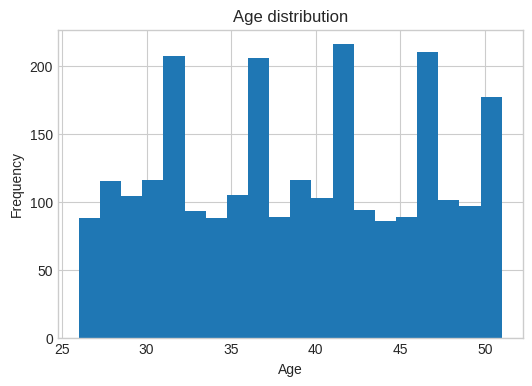

In [ ]:
hist_plot(numeric_cols)

* equal amount of duration at the set price (btwn 10-15)
* 30-50 age distribution

<a name = "2.3"></a><br>
##2.3 Drop repetitive data

In [ ]:
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [ ]:
netflix_df.sort_values(by=['Join Date'], inplace=True)

In [ ]:
netflix_df.pivot_table(index=["Subscription Type", "Monthly Revenue"],
                       values=["Age", "Join Date"])

Age
Subscription Type Monthly Revenue           
Basic             10               39.418750
                  11               38.828402
                  12               38.188889
                  13               39.898810
                  14               38.823171
                  15               37.829114
Premium           10               38.796875
                  11               39.434343
                  12               37.400000
                  13               39.584000
                  14               38.740741
                  15               37.259542
Standard          10               39.338843
                  11               38.583333
                  12               37.962500
                  13               39.808000
                  14               39.015152
                  15               39.809091

Text(0.5, 0.98, "Subscription Type's price change throughout years")

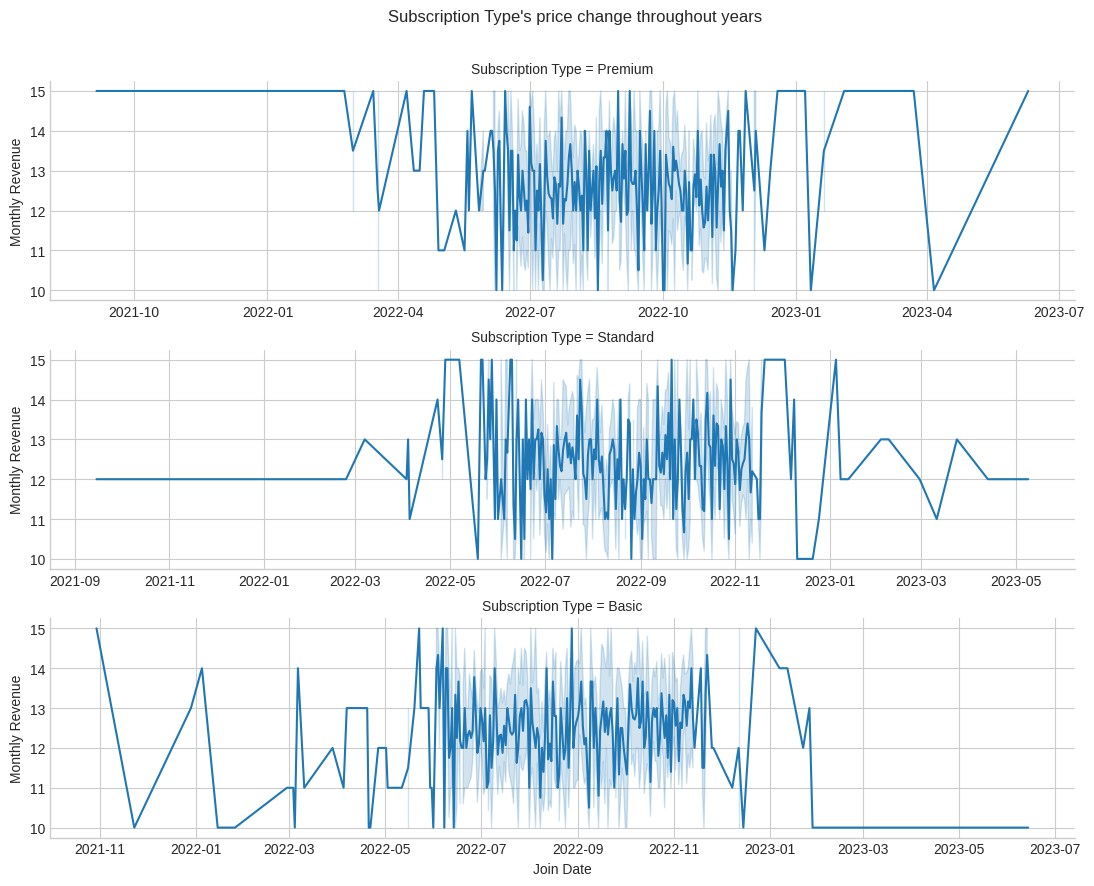

In [ ]:
g = sns.FacetGrid(netflix_df, row='Subscription Type', aspect=3.5, sharex=False)
g.map(sns.lineplot,"Join Date","Monthly Revenue")
g.fig.subplots_adjust(top=0.9, left=0)
g.fig.suptitle('Subscription Type\'s price change throughout years')

In [ ]:
filtered_df = netflix_df[(netflix_df['Join Date'] >= '2022-07-01') & (netflix_df['Join Date'] < '2023-10-01')]
filtered_df = filtered_df[filtered_df['Subscription Type'] == 'Basic']
result = filtered_df[['Subscription Type', 'Monthly Revenue', 'Join Date', 'Country']]
result.head(15)

,Subscription Type,Monthly Revenue,Join Date,Country
1513,Basic,12,2022-07-01,Australia
441,Basic,12,2022-07-01,Canada
1149,Basic,15,2022-07-01,United States
1721,Basic,13,2022-07-01,Canada
1219,Basic,13,2022-07-01,Italy
1009,Basic,12,2022-07-01,Italy
1363,Basic,14,2022-07-01,Australia
514,Basic,15,2022-07-01,Italy
1304,Basic,11,2022-07-01,Germany
538,Basic,12,2022-07-02,Australia


In [ ]:
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
47,48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet,1 Month
27,28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet,1 Month
57,58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone,1 Month
17,18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone,1 Month


In [ ]:
netflix_df[(netflix_df['Country'] == 'Australia') & (netflix_df['Subscription Type'] == 'Standard')]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
23,24,Standard,12,2022-04-03,2023-06-26,Australia,31,Male,Tablet,1 Month
173,174,Standard,14,2022-04-23,2023-06-25,Australia,39,Female,Tablet,1 Month
43,44,Standard,12,2022-04-26,2023-06-26,Australia,29,Male,Tablet,1 Month
183,184,Standard,13,2022-04-26,2023-06-25,Australia,28,Female,Laptop,1 Month
383,384,Standard,10,2022-05-19,2023-06-28,Australia,35,Female,Smartphone,1 Month
323,324,Standard,15,2022-05-22,2023-06-27,Australia,32,Male,Tablet,1 Month
33,34,Standard,12,2022-05-25,2023-06-26,Australia,29,Male,Smartphone,1 Month
233,234,Standard,14,2022-05-26,2023-06-27,Australia,44,Female,Laptop,1 Month
453,454,Standard,15,2022-05-28,2023-06-28,Australia,51,Female,Tablet,1 Month
303,304,Standard,12,2022-06-11,2023-06-29,Australia,33,Female,Smartphone,1 Month


"Monthly Revenue" is not dependent on "Subscription Type, neither on "Country".

In [ ]:
netflix_df['Plan Duration'].value_counts()

1 Month    2500
Name: Plan Duration, dtype: int64

In [ ]:
netflix_df.drop("Plan Duration", axis=1, inplace=True)

plan duration of users are all 1 month

In [ ]:
netflix_df.set_index("User ID", inplace=True)

User ID is unique and ascending, so it's the same as index column

<a name = "3"></a><br>
#3. Outlier detection

In [ ]:
netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
User ID,,,,,,,,
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet
48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet
28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet
58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone
18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone


In [ ]:
def find_outliers(columns, dataset = netflix_df):
  outliers = []
  for col in columns:
    col_series = dataset[col].sort_values()

    Q2 = col_series.median()
    mid_data = round(len(col_series)/2)
    Q1, Q3 = col_series[:mid_data].median(), col_series[mid_data:].median()
    IQR = Q3 - Q1
    data_max, data_min = Q3 + IQR *1.5, Q1 - IQR * 1.5

    for i in col_series:
      if i > data_max or i < data_min:
        outliers.append([col, i])

  return pd.pivot_table(pd.DataFrame(outliers, columns=['columns', 'outlier']), index=['columns', 'outlier'])


In [ ]:
find_outliers(['Monthly Revenue', 'Age'])

,
columns,outlier


It seems like the netflix dataset has no outliers. So, just to be sure:

In [ ]:
dummy_set = pd.DataFrame({'a': [10,19,20,21,22,22,23,24,24,25,26,26],
                          'b': [1,450,550,650,620,750,800,820,850,900, 900,10000]})

In [ ]:
find_outliers(['a', 'b'], dataset = dummy_set)

Empty DataFrame
Columns: []
Index: [(a, 10), (b, 1), (b, 10000)]

<a name = "4"></a><br>
#4. Visualization

In [ ]:
netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
User ID,,,,,,,,
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet
48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet
28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet
58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone
18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone


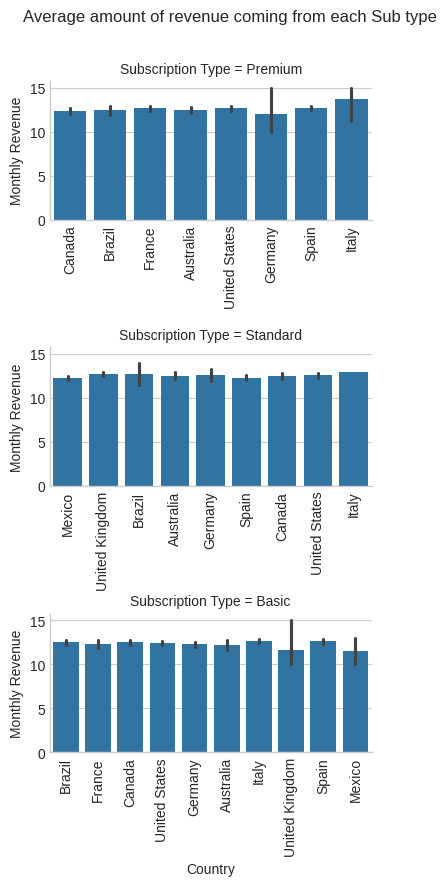

In [ ]:
g = sns.FacetGrid(netflix_df, row = "Subscription Type", sharex=False)
g.map(sns.barplot, "Country","Monthly Revenue")

for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
g.add_legend()

g.fig.subplots_adjust(top=0.9, left=-0.08)
g.fig.suptitle('Average amount of revenue coming from each Sub type')

plt.show();
warnings.simplefilter("ignore")

In [ ]:
country_gender = pd.pivot_table(netflix_df, index=['Country', 'Gender'], values=["Age"],
               aggfunc='count')
country_gender.reset_index(inplace=True)
country_gender.rename(columns={"Age": "Count"}, inplace=True)
country_gender.head()

,Country,Gender,Count
0,Australia,Female,89
1,Australia,Male,94
2,Brazil,Female,95
3,Brazil,Male,88
4,Canada,Female,157


Text(0.5, 1.06, 'Gender ratio of each country')

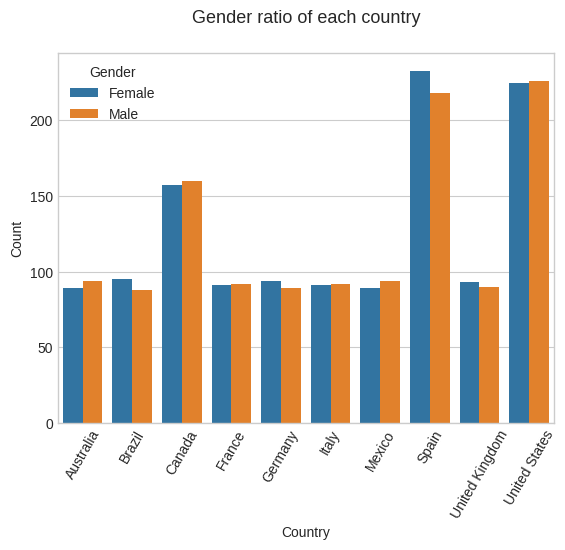

In [ ]:
g = sns.barplot(country_gender, x='Country', y='Count', hue='Gender')
plt.xticks(rotation=60);
plt.title('Gender ratio of each country', y=1.06, fontsize = 13)

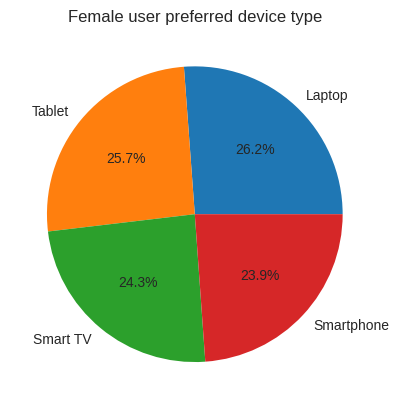

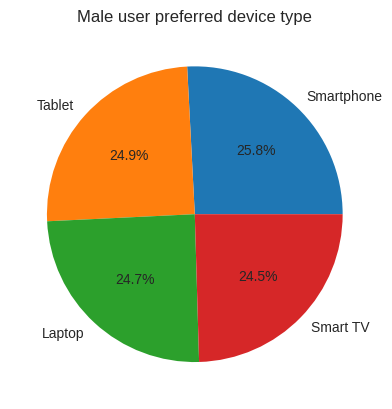

In [ ]:

female_device = netflix_df['Device'][netflix_df['Gender'] == 'Female'].value_counts()
male_device = netflix_df['Device'][netflix_df['Gender'] == 'Male'].value_counts()
plt.pie(female_device.values, labels=female_device.index, autopct='%1.1f%%')
plt.title("Female user preferred device type")
plt.show()
plt.pie(male_device.values, labels=male_device.index, autopct='%1.1f%%')
plt.title("Male user preferred device type");

In [ ]:
netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
User ID,,,,,,,,
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet
48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet
28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet
58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone
18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone


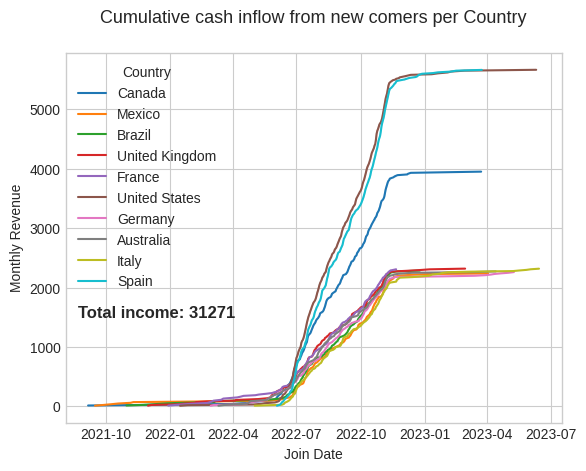

In [ ]:
df = netflix_df.groupby('Country')['Monthly Revenue'].cumsum()
g = sns.lineplot(x=netflix_df['Join Date'], y=df, hue=netflix_df['Country'])
g.text(18860.235, 1500, f"Total income: {netflix_df['Monthly Revenue'].sum()}",fontsize = 12, fontweight ='bold')
plt.title('Cumulative cash inflow from new comers per Country', y=1.06, fontsize = 13)
plt.show()

<a name = "5"></a><br>
#5. Feature Engineering

In [ ]:
netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
User ID,,,,,,,,
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet
48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet
28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet
58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone
18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone


In [ ]:
netflix_df['Age group'] = pd.cut(netflix_df['Age'],
                                 bins=[0, 25, 30, 35, 40, 45, 50, 55, 100],
                                 labels = [' < 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '45 - 55', ' 55 < '])

netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Age group
User ID,,,,,,,,,
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,30 - 35
48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet,30 - 35
28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet,30 - 35
58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone,30 - 35
18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone,40 - 45


In [ ]:
netflix_df['Stay duration'] = round((netflix_df['Last Payment Date'] - netflix_df['Join Date']).dt.days/365, 2)
netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Age group,Stay duration
User ID,,,,,,,,,,
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,30 - 35,1.79
48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet,30 - 35,1.77
28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet,30 - 35,1.74
58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone,30 - 35,1.71
18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone,40 - 45,1.68


Text(0.5, 1.06, 'Age categories average stay duration')

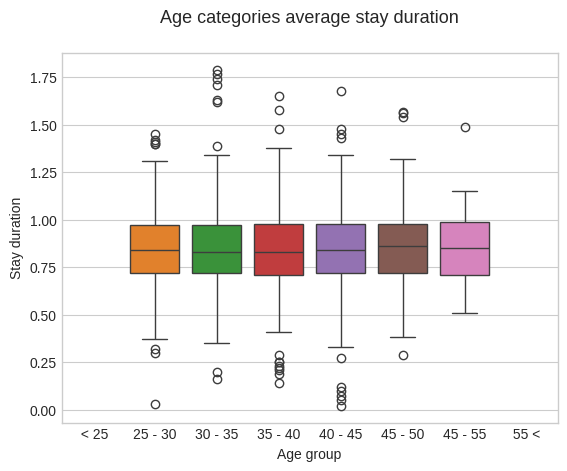

In [ ]:
sns.boxplot(netflix_df, x='Age group', y='Stay duration', palette='tab10')
plt.title('Age categories average stay duration', y=1.06, fontsize = 13)

Text(0.5, 0.98, "Subscription duration of each country's age groups")

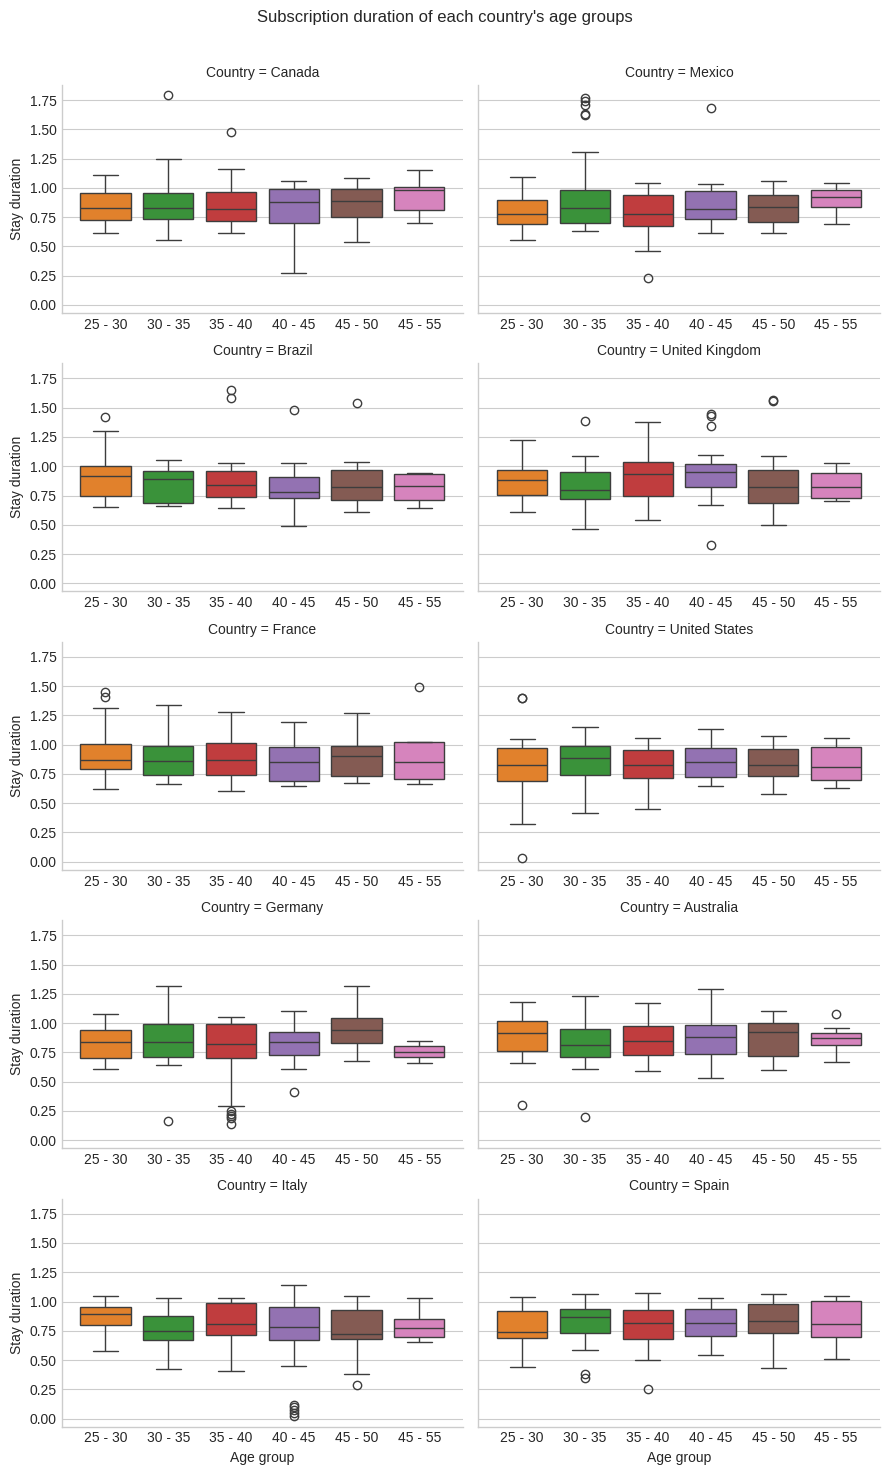

In [ ]:
# subscription duration of each country's age groups
g = sns.FacetGrid(netflix_df, col='Country', col_wrap=2, sharex=False, aspect=1.5)
g.map(sns.boxplot, 'Age group', 'Stay duration', palette='tab10')
g.set(xlim=(0.3, 6.7))
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Subscription duration of each country\'s age groups')

Text(0.5, 1.06, 'In which month each age group tend to join more')

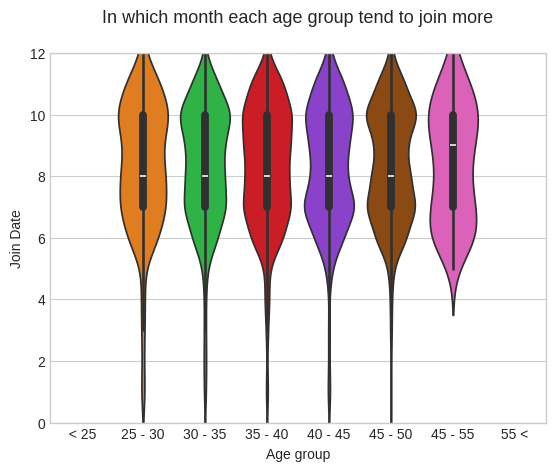

In [ ]:
g = sns.violinplot(netflix_df, x='Age group', y=netflix_df['Join Date'].dt.month, palette='bright')
g.set_ylim(0, 12)
plt.title('In which month each age group tend to join more', y=1.06, fontsize = 13)

<a name = "6"></a><br>
#6. Categorical columns ordinal encoding

In [ ]:
netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Age group,Stay duration
User ID,,,,,,,,,,
2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,30 - 35,1.79
48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet,30 - 35,1.77
28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet,30 - 35,1.74
58,Standard,12,2021-10-08,2023-06-24,Mexico,34,Male,Smartphone,30 - 35,1.71
18,Standard,12,2021-10-18,2023-06-24,Mexico,43,Male,Smartphone,40 - 45,1.68


In [ ]:
netflix_df.to_csv('Exported_netflix_userbase.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Fit and transform the categorical data
columns_to_encode = ['Subscription Type', 'Country', 'Gender', 'Device', 'Age group']

le = LabelEncoder()
col_mapping = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
for column in columns_to_encode:
    netflix_df[column] = le.fit_transform(netflix_df[column])
    for i in range(0,len(le.classes_)):
        col_mapping.loc[len(col_mapping.index)] = [column, le.classes_[i], le.transform(le.classes_)[i]]

In [ ]:
col_mapping.head()

,Column,Original,Encoded
0,Subscription Type,Basic,0
1,Subscription Type,Premium,1
2,Subscription Type,Standard,2
3,Country,Australia,0
4,Country,Brazil,1


In [ ]:
netflix_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Age group,Stay duration
User ID,,,,,,,,,,
2,1,15,2021-09-05,2023-06-22,2,35,0,3,1,1.79
48,2,12,2021-09-15,2023-06-24,6,32,1,3,1,1.77
28,2,12,2021-09-27,2023-06-24,6,33,1,3,1,1.74
58,2,12,2021-10-08,2023-06-24,6,34,1,2,1,1.71
18,2,12,2021-10-18,2023-06-24,6,43,1,2,3,1.68


In [ ]:
netflix_df.to_csv('Exported_netflix_userbase_encoded.csv')

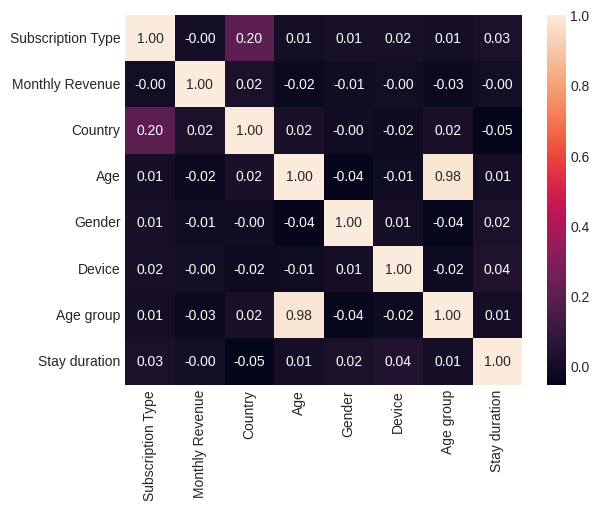

In [ ]:
sns.heatmap(netflix_df.corr(), annot = True, fmt = ".2f")
plt.show();